<a href="https://colab.research.google.com/github/amirmohammadkalateh/Thyroid_Diff/blob/main/Thyroid_Diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load and preprocess data
def preprocess_data():
    df = pd.read_csv('Thyroid_Diff.csv')

    # Convert categorical variables to numerical
    categorical_columns = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
                         'Thyroid Function', 'Physical Examination', 'Adenopathy',
                         'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage',
                         'Response']

    label_encoders = {}
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

    # Split features and target
    X = df.drop(['Recurred'], axis=1)
    y = df['Recurred'].map({'Yes': 1, 'No': 0})

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

def create_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

def main():
    # Prepare data
    X_train, X_test, y_train, y_test = preprocess_data()

    # Create and train model
    model = create_model(X_train.shape[1])
    history = model.fit(X_train, y_train,
                       epochs=100,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1)

    # Evaluate model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"\nTest Accuracy: {accuracy*100:.2f}%")

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate additional metrics
    from sklearn.metrics import classification_report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_binary))

if __name__ == "__main__":
    main()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6106 - loss: 0.6725 - val_accuracy: 0.8065 - val_loss: 0.5605
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8118 - loss: 0.5364 - val_accuracy: 0.8387 - val_loss: 0.4462
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8562 - loss: 0.4256 - val_accuracy: 0.8548 - val_loss: 0.3648
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8886 - loss: 0.3412 - val_accuracy: 0.8710 - val_loss: 0.3159
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8852 - loss: 0.2818 - val_accuracy: 0.8710 - val_loss: 0.2868
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8949 - loss: 0.2408 - val_accuracy: 0.8710 - val_loss: 0.2770
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9005 - loss: 0.2431 - val_accuracy: 0.8710 - val_loss: 0.2831
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9038 - loss: 0.2138 - val_accuracy: 0.8710 - val_loss:

# ***`with plot`***

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5192 - loss: 0.6880 - val_accuracy: 0.8226 - val_loss: 0.5455
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8418 - loss: 0.5246 - val_accuracy: 0.8226 - val_loss: 0.4263
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8790 - loss: 0.4059 - val_accuracy: 0.8387 - val_loss: 0.3426
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8843 - loss: 0.3278 - val_accuracy: 0.8710 - val_loss: 0.3000
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8879 - loss: 0.2808 - val_accuracy: 0.8871 - val_loss: 0.2773
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9031 - loss: 0.2393 - val_accuracy: 0.8871 - val_loss: 0.2740
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9201 - loss: 0.2088 - val_accuracy: 0.8871 - val_loss: 0.2873
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9143 - loss: 0.1995 - val_accuracy: 0.8871 - val_loss: 0.2992
Epoc

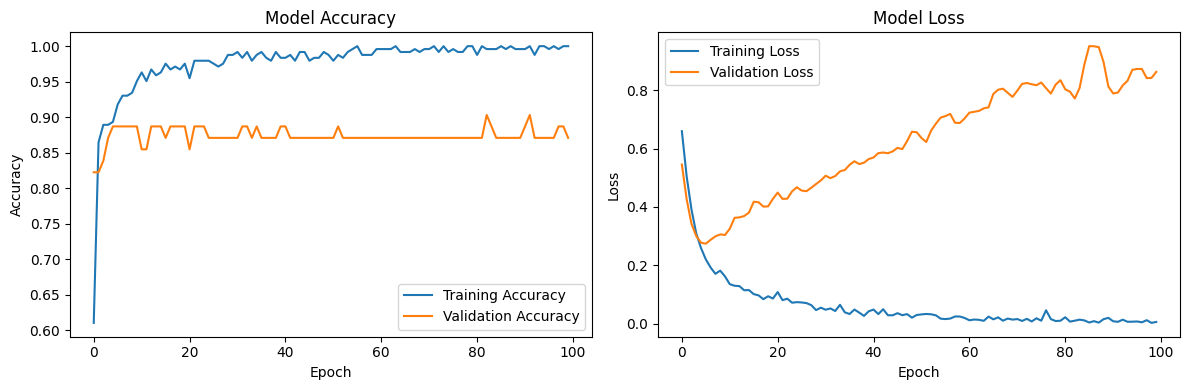

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9649 - loss: 0.4598

Test Accuracy: 96.10%
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.84      0.91        19

    accuracy                           0.96        77
   macro avg       0.98      0.92      0.94        77
weighted avg       0.96      0.96      0.96        77



In [7]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load and preprocess data
def preprocess_data():
    df = pd.read_csv('Thyroid_Diff.csv')

    # Convert categorical variables to numerical
    categorical_columns = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
                         'Thyroid Function', 'Physical Examination', 'Adenopathy',
                         'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage',
                         'Response']

    label_encoders = {}
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

    # Split features and target
    X = df.drop(['Recurred'], axis=1)
    y = df['Recurred'].map({'Yes': 1, 'No': 0})

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

def create_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

def plot_training_history(history):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    # Prepare data
    X_train, X_test, y_train, y_test = preprocess_data()

    # Create and train model
    model = create_model(X_train.shape[1])
    history = model.fit(X_train, y_train,
                       epochs=100,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1)

    # Plot training history
    plot_training_history(history)

    # Evaluate model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"\nTest Accuracy: {accuracy*100:.2f}%")

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate additional metrics
    from sklearn.metrics import classification_report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_binary))

if __name__ == "__main__":
    main()
